In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import random
from collections import defaultdict
import matplotlib.pyplot as plt

import random

In [2]:
df_label = pd.read_csv("files/tcga-brca_label.csv")
df_label.head()

,filename,case_id,submitter_id,age,ethnicity,gender,race,primary_diagnosis,label
0,TCGA-A2-A25D-01Z-00-DX1.41DADDB8-3E3F-4F8F-8BE...,3b963d72-ba5c-467b-83c9-fbdb462510a3,TCGA-A2-A25D,89,not hispanic or latino,female,white,"Lobular carcinoma, NOS",ILC
1,TCGA-AR-A5QP-01Z-00-DX1.256FDB13-1F81-42DA-AF6...,3c275152-d04b-440c-9621-2fc05ea977b6,TCGA-AR-A5QP,54,not hispanic or latino,female,white,"Lobular carcinoma, NOS",ILC
2,TCGA-C8-A12P-01Z-00-DX1.670B5DE8-07B0-4E4C-93F...,abdc76db-f85e-4337-a57e-6d098789da03,TCGA-C8-A12P,55,not hispanic or latino,female,asian,"Infiltrating duct carcinoma, NOS",IDC
3,TCGA-E9-A1N8-01Z-00-DX1.1243AB1C-75A3-4A5E-967...,ac075bc0-1b59-4557-beea-541694faee03,TCGA-E9-A1N8,48,not hispanic or latino,female,white,"Infiltrating duct carcinoma, NOS",IDC
4,TCGA-A2-A0YF-01Z-00-DX1.6166E995-0669-43D6-B9C...,ae8c77fe-e6c8-44d5-8265-4a38c637bbef,TCGA-A2-A0YF,67,not hispanic or latino,female,black or african american,"Infiltrating duct carcinoma, NOS",IDC


In [3]:
filename_list = df_label["filename"].to_list()
print(filename_list[0:10])

['TCGA-A2-A25D-01Z-00-DX1.41DADDB8-3E3F-4F8F-8BE7-C43F8FBCFD2B', 'TCGA-AR-A5QP-01Z-00-DX1.256FDB13-1F81-42DA-AF6E-8A94835550C1', 'TCGA-C8-A12P-01Z-00-DX1.670B5DE8-07B0-4E4C-93FA-FA3DFFCCE50D', 'TCGA-E9-A1N8-01Z-00-DX1.1243AB1C-75A3-4A5E-9674-53992E6DD377', 'TCGA-A2-A0YF-01Z-00-DX1.6166E995-0669-43D6-B9C7-FE39BCE529CF', 'TCGA-EW-A1OV-01Z-00-DX1.93698123-5B34-4163-848B-2D75A5F7B001', 'TCGA-OL-A66L-01Z-00-DX1.E01BA275-57A5-49DF-9376-1AD0BDFFF7E2', 'TCGA-D8-A27V-01Z-00-DX1.F937C53B-0B55-4271-843E-2C28F72CF28E', 'TCGA-B6-A1KF-01Z-00-DX1.2E08E830-4216-4CD0-9646-1F489300E11D', 'TCGA-BH-A203-01Z-00-DX1.FAE40A13-0C4A-415F-9396-01041FF6B855']


In [5]:
tss_list = [name.split('-')[1] for name in filename_list]

# Count distribution
counter = Counter(tss_list)

for tss, count in counter.items():
    print(f"TSS Code: {tss}, Count: {count}")

TSS Code: A2, Count: 93
TSS Code: AR, Count: 64
TSS Code: C8, Count: 43
TSS Code: E9, Count: 46
TSS Code: EW, Count: 36
TSS Code: OL, Count: 20
TSS Code: D8, Count: 100
TSS Code: B6, Count: 42
TSS Code: BH, Count: 131
TSS Code: E2, Count: 88
TSS Code: AO, Count: 38
TSS Code: A8, Count: 80
TSS Code: AC, Count: 40
TSS Code: LL, Count: 18
TSS Code: A7, Count: 51
TSS Code: GM, Count: 19
TSS Code: A1, Count: 9
TSS Code: AN, Count: 31
TSS Code: JL, Count: 2
TSS Code: S3, Count: 12
TSS Code: LD, Count: 3
TSS Code: PE, Count: 3
TSS Code: WT, Count: 2
TSS Code: OK, Count: 4
TSS Code: PL, Count: 7
TSS Code: AQ, Count: 7
TSS Code: GI, Count: 2
TSS Code: 3C, Count: 5
TSS Code: MS, Count: 1
TSS Code: HN, Count: 2
TSS Code: XX, Count: 2
TSS Code: 5L, Count: 2
TSS Code: UU, Count: 1
TSS Code: LQ, Count: 1
TSS Code: 4H, Count: 1
TSS Code: UL, Count: 1
TSS Code: Z7, Count: 1
TSS Code: W8, Count: 1


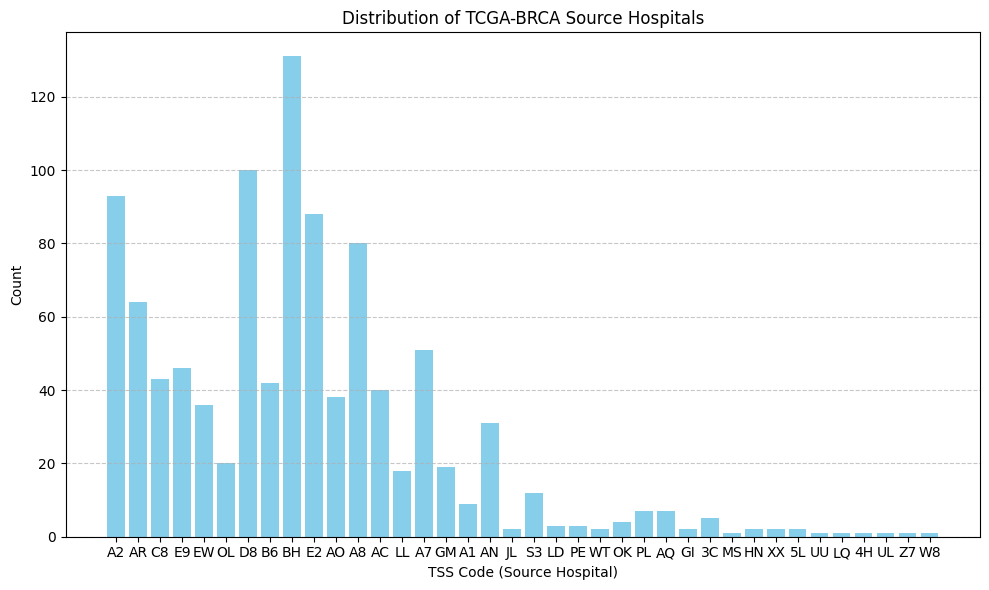

In [6]:
# Plot figure for count distribution
labels = list(counter.keys())
counts = list(counter.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('TSS Code (Source Hospital)')
plt.ylabel('Count')
plt.title('Distribution of TCGA-BRCA Source Hospitals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
target_tss_list = ['A2', 'AR', 'D8']

# Split the group
tss_to_files = defaultdict(list)
for f in filename_list:
    tss = f.split('-')[1]
    if tss in target_tss_list:
        tss_to_files[tss].append(f)

# Random select
selected_files = []
samples_per_tss = 5  # Select num

for tss in target_tss_list:
    files = tss_to_files[tss]
    if len(files) >= samples_per_tss:
        selected = random.sample(files, samples_per_tss)
    else:
        selected = files
    selected_files.extend(selected)

# Output selected files
print("Selected Files:")
for f in selected_files:
    print(f)

Selected Files:
TCGA-A2-A0T6-01Z-00-DX1.207A3883-5B41-40EB-95A1-D64C9610650B
TCGA-A2-A3XU-01Z-00-DX1.174A92D4-50B2-4A59-AD31-D5EC5BBF2F65
TCGA-A2-A0CT-01Z-00-DX1.A8564130-49CF-4F5B-B5AB-F4D1A10479FF
TCGA-A2-A04T-01Z-00-DX1.71444266-BD56-4183-9603-C7AC20C9DA1E
TCGA-A2-A259-01Z-00-DX1.7289CD72-CB74-41D4-B4AC-4EA5FDFEC666
TCGA-AR-A0U3-01Z-00-DX1.9BB87F9D-459F-4A18-B591-29822EA5AE18
TCGA-AR-A255-01Z-00-DX1.E67C081D-50C9-451C-814B-F097B2671300
TCGA-AR-A1AK-01Z-00-DX1.0AFFA0B5-D1A6-43E9-892A-7CB16A79E5F9
TCGA-AR-A1AV-01Z-00-DX1.93698893-7C5C-44C1-A488-ED358D523693
TCGA-AR-A1AT-01Z-00-DX1.6ED69002-2CC1-4AD4-9573-B245D7C2D060
TCGA-D8-A1Y2-01Z-00-DX1.77451A0F-00FD-44A9-A0D0-CB7A39CE74CC
TCGA-D8-A1XY-01Z-00-DX1.AC051FB4-1D51-449B-BF2D-9DDB4382414C
TCGA-D8-A145-01Z-00-DX2.B834BF47-1CD6-45EA-BB88-D8ECE1FDDC6A
TCGA-D8-A27T-01Z-00-DX2.7CCFE3AA-955B-4D77-9EDB-7B36D5A01168
TCGA-D8-A1XB-01Z-00-DX1.DA8E2FA4-DBBA-4157-8052-B90FB3BB58F1


In [7]:
import pandas as pd

# 假设 selected_files 是从前面选出来的列表
df = pd.DataFrame({'file_name': selected_files})
df.to_csv('files/tcga-brca_selected_files.csv', index=False)

print("Stored in files")

Stored in files


In [8]:
coord_h5_input = "/raid/mengliang/wsi_process/tcga-brca_patch/patches/"
wsi_root = "/home/mxz3935/dataset_folder/tcga-brca/"

# 保存三元组：filename, coord_path, wsi_path
triplets = []

for filename in selected_files:

    # 生成完整路径
    coord_path = os.path.join(coord_h5_input, f"{filename}.h5")
    wsi_path = os.path.join(wsi_root, f"{filename}.svs")

    triplets.append((filename, coord_path, wsi_path))

# 转换为 DataFrame 并保存为 CSV
df_triplets = pd.DataFrame(triplets, columns=["filename", "coord_path", "wsi_path"])
df_triplets.to_csv("files/tcga-brca_selected_triplets.csv", index=False)

print("保存完成: selected_triplets.csv")

保存完成: selected_triplets.csv


In [9]:
import os
import h5py
import numpy as np
import pandas as pd
import openslide
from tqdm import tqdm
from PIL import Image

import random

# ========= 可配置参数 =========
triplet_csv = "files/tcga-brca_selected_triplets.csv"
output_root = "tcga-brca_selected_patch"
patch_size = 256
num_sampled_patches = 100  # 每个 WSI 采样 patch 数量
random_seed = 42

os.makedirs(output_root, exist_ok=True)
random.seed(random_seed)

# ========= 读取 CSV =========
df = pd.read_csv(triplet_csv)

# ========= 遍历每一条记录 =========
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing Slides"):
    filename, coord_path, wsi_path = row["filename"], row["coord_path"], row["wsi_path"]
    slide_id = os.path.splitext(filename)[0]
    slide_output_dir = os.path.join(output_root, slide_id)
    os.makedirs(slide_output_dir, exist_ok=True)

    # 检查文件是否存在
    if not os.path.isfile(coord_path) or not os.path.isfile(wsi_path):
        print(f"[Skip] Missing file for {slide_id}")
        continue

    # 读取坐标
    with h5py.File(coord_path, "r") as f:
        coords = f["coords"][:]  # [N, 2]

    # 随机选择 patch
    if len(coords) == 0:
        print(f"[Skip] No coords in {slide_id}")
        continue
    sampled_coords = coords if len(coords) <= num_sampled_patches else random.sample(list(coords), num_sampled_patches)

    # 打开 slide
    slide = openslide.OpenSlide(wsi_path)

    # 提取 patch 并保存为 .npy
    for coord in sampled_coords:
        x, y = map(int, coord)
        patch = slide.read_region((x, y), 0, (patch_size, patch_size)).convert("RGB")
        patch_np = np.array(patch)  # [H, W, 3]
        patch_name = f"{x}_{y}.npy"
        np.save(os.path.join(slide_output_dir, patch_name), patch_np)

Processing Slides: 100%|██████████| 15/15 [00:53<00:00,  3.56s/it]


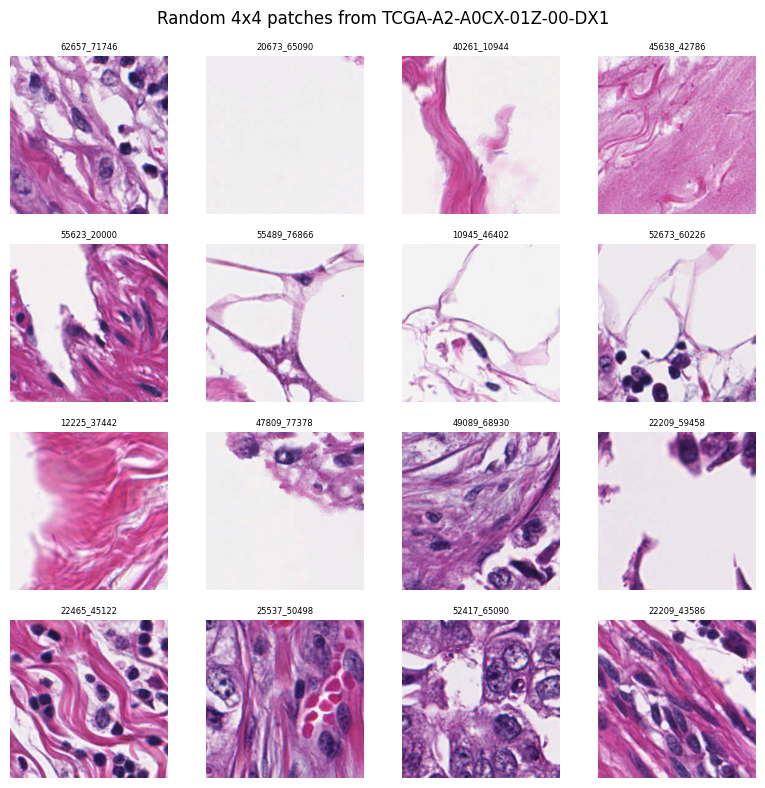

In [8]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# 选择某个 slide 的子文件夹
slide_folder = "tcga-brca_selected_patch/TCGA-A2-A0CX-01Z-00-DX1"  # <-- 改成你的子文件夹路径

# 获取所有 .npy patch 路径
all_patches = [f for f in os.listdir(slide_folder) if f.endswith('.npy')]
if len(all_patches) < 16:
    raise ValueError("该 slide patch 数量少于 16 个")

# 随机选取 16 个
selected = random.sample(all_patches, 16)

# 创建图像画布
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle(f"Random 4x4 patches from {os.path.basename(slide_folder)}")

for i, patch_file in enumerate(selected):
    ax = axes[i // 4, i % 4]
    patch_path = os.path.join(slide_folder, patch_file)
    patch = np.load(patch_path)  # [H, W, 3]
    ax.imshow(patch)
    ax.axis('off')
    ax.set_title(patch_file.replace('.npy', ''), fontsize=6)

plt.tight_layout()
plt.show()